In [ ]:
# Cria uma cópia independente do dicionário fundamentos
copia_fundamentos = fundamentos.copy()

In [ ]:
# Cria DataFrame vazio para consolidar dados
base_dados = pd.DataFrame()

# Itera sobre as empresas e concatena os dados ajustados
for empresa in copia_fundamentos:
    # Remove a primeira e a última linha, reseta o índice
    copia_fundamentos[empresa] = copia_fundamentos[empresa][1:-1].reset_index(drop=True)
    # Concatena os dados no DataFrame base
    base_dados = pd.concat([base_dados, copia_fundamentos[empresa]], ignore_index=True)

# Exibe o DataFrame consolidado
display(base_dados)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber_1,Estoques_1,Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Outros Ativos Não Circulantes,...,Outros,Tributos Diferidos,Provisões,Participação dos Acionistas Não Controladores,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Lucros,Lucros/Prejuízos Acumulados,Decisao
0,0.549939,1.330213,0.014505,4.959588,0.242111,0.000000,0.000000,-0.015208,0.048054,0.029557,...,0.013238,-0.503053,0.020721,0.000000,0.939559,1.626958,0.012065,0.000000,1.000000,2
1,0.025140,0.001751,-0.628269,0.008196,-0.004096,0.000000,0.000000,0.340022,0.056044,0.071018,...,0.394285,1.938575,0.059163,0.000000,0.043645,0.011612,0.017367,0.000000,0.700204,0
2,0.064170,0.075011,0.447646,0.083121,0.026369,0.000000,0.000000,0.004773,0.151604,0.118479,...,-0.139764,1.083612,0.047331,0.000000,0.067820,0.009291,0.014564,0.000000,0.761661,2
3,0.020177,-0.010031,-0.279523,-0.080537,-0.057545,0.000000,0.000000,0.738211,0.019758,0.035082,...,-0.009093,0.678571,0.008165,0.000000,-0.006942,0.000840,0.013241,0.824750,-1.000000,2
4,0.086955,0.123761,0.464246,0.021314,0.300452,0.000000,0.000000,0.339141,0.067624,0.069654,...,0.010157,0.361344,0.002966,0.000000,0.085317,0.000000,0.030740,0.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,0.046280,0.105747,0.100585,0.000000,0.016710,0.003060,-0.081380,0.266591,0.144147,0.000000,...,-0.038891,-0.064911,0.000000,0.038606,0.088443,0.000000,0.201900,-0.062045,1.006033,2
1878,0.057942,0.222772,0.700756,0.000000,-0.115919,0.033168,-0.095935,-0.070393,-0.201191,0.000000,...,-0.037687,-0.030925,0.000000,-0.043472,0.011296,0.000000,0.143223,0.323036,-1.000000,2
1879,0.009613,-0.164503,-0.450446,0.000000,0.182347,0.130405,0.111996,0.178069,0.438084,0.000000,...,0.031214,-0.143980,0.000000,0.192342,0.025303,0.000000,-0.227002,0.000000,1.000000,2
1880,0.063434,0.200141,0.416375,0.000000,-0.200009,-0.030967,0.039333,0.265041,0.107850,0.000000,...,0.097198,-0.043000,0.000000,0.026601,-0.032098,0.000000,-0.032427,0.000000,-1.000000,0


In [ ]:
# Importa bibliotecas de visualização
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Exibe distribuição percentual da variável 'Decisao'
display(base_dados['Decisao'].value_counts(normalize=True).map('{:.1%}'.format))

# Cria e exibe histograma interativo da variável 'Decisao'
fig = px.histogram(base_dados, x='Decisao', color='Decisao')
fig.show()

,proportion
Decisao,
2,50.0%
0,43.7%
1,6.3%


In [ ]:
# Substitui a classe 1 pela classe 0 na variável 'Decisao'
base_dados.loc[base_dados['Decisao'] == 1, 'Decisao'] = 0

# Exibe novamente a distribuição percentual após ajuste
display(base_dados['Decisao'].value_counts(normalize=True).map('{:.1%}'.format))

# Gera e exibe novo histograma interativo
fig = px.histogram(base_dados, x='Decisao', color='Decisao')
fig.show()

,proportion
Decisao,
2,50.0%
0,50.0%


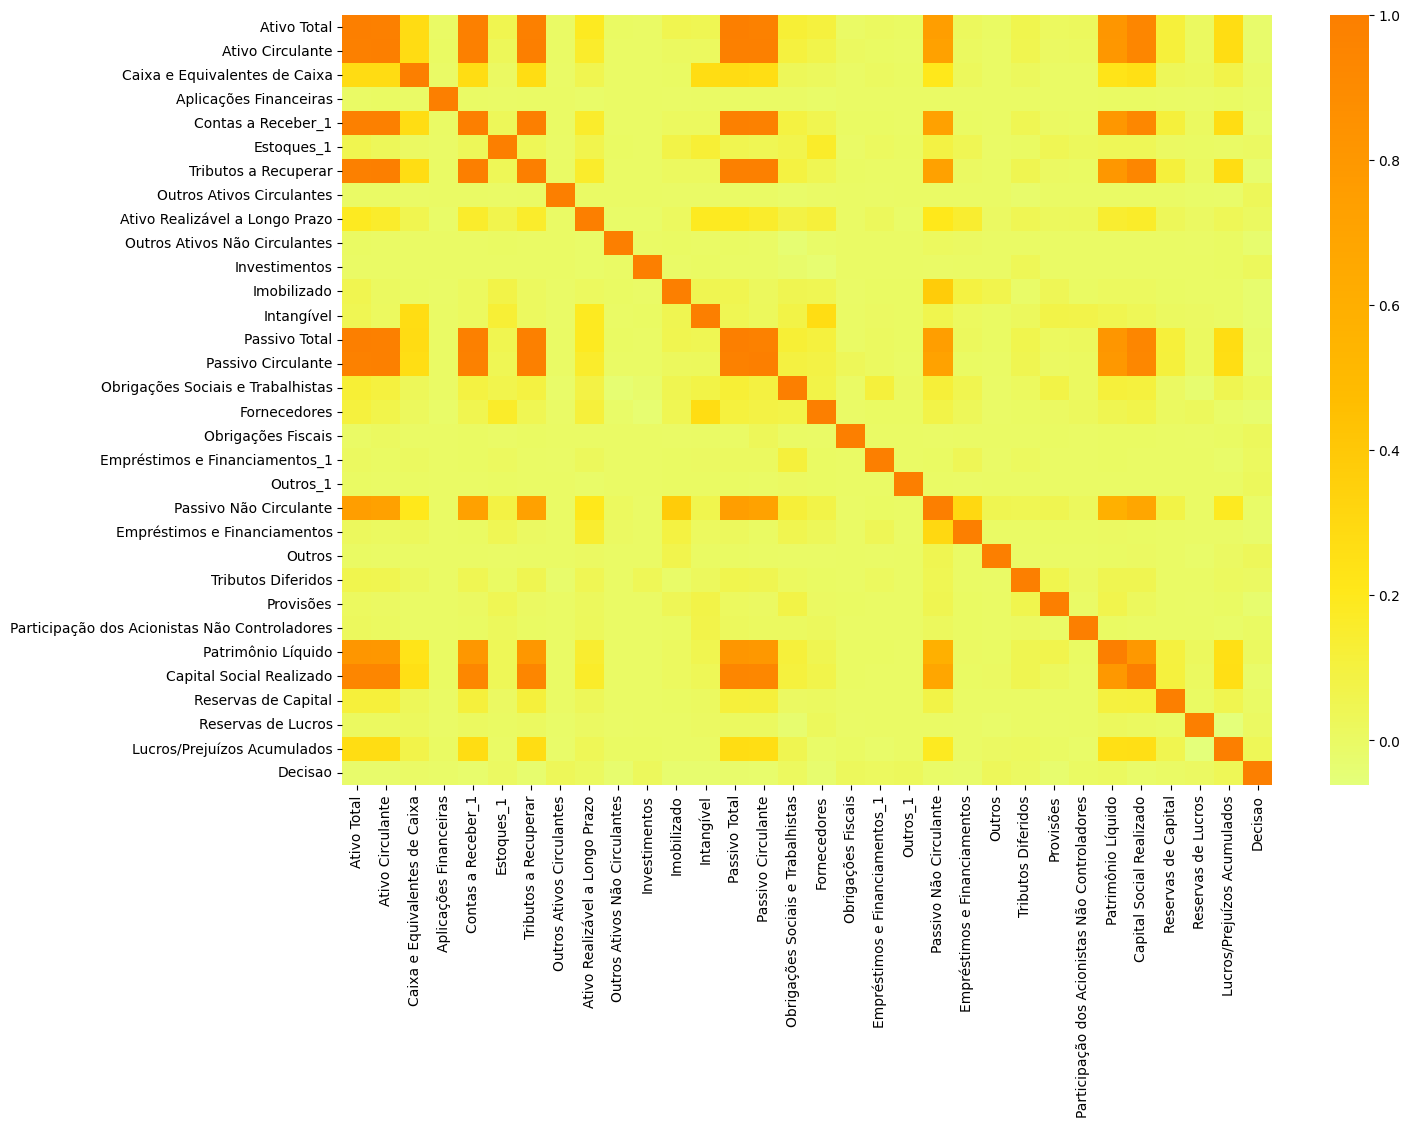

In [ ]:
# Calcula a matriz de correlação entre as variáveis numéricas
correlacoes = base_dados.corr()

# Gera o heatmap das correlações com Seaborn
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlacoes, cmap='Wistia', ax=ax)
plt.show()

In [ ]:
# Identifica pares de variáveis com correlação absoluta acima de 0.8
correlacoes_encontradas = []
for coluna in correlacoes:
    for linha in correlacoes.index:
        if linha != coluna:
            valor = abs(correlacoes.loc[linha, coluna])
            if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas:
                correlacoes_encontradas.append((linha, coluna, valor))
                print(f'Correlacao Encontrada: {linha} e {coluna}. valor: {valor:.2f}')

Correlacao Encontrada: Ativo Circulante e Ativo Total. valor: 0.99
Correlacao Encontrada: Contas a Receber_1 e Ativo Total. valor: 0.99
Correlacao Encontrada: Tributos a Recuperar e Ativo Total. valor: 0.99
Correlacao Encontrada: Passivo Total e Ativo Total. valor: 1.00
Correlacao Encontrada: Passivo Circulante e Ativo Total. valor: 0.99
Correlacao Encontrada: Patrimônio Líquido e Ativo Total. valor: 0.81
Correlacao Encontrada: Capital Social Realizado e Ativo Total. valor: 0.94
Correlacao Encontrada: Contas a Receber_1 e Ativo Circulante. valor: 1.00
Correlacao Encontrada: Tributos a Recuperar e Ativo Circulante. valor: 1.00
Correlacao Encontrada: Passivo Total e Ativo Circulante. valor: 0.99
Correlacao Encontrada: Passivo Circulante e Ativo Circulante. valor: 0.99
Correlacao Encontrada: Patrimônio Líquido e Ativo Circulante. valor: 0.81
Correlacao Encontrada: Capital Social Realizado e Ativo Circulante. valor: 0.94
Correlacao Encontrada: Tributos a Recuperar e Contas a Receber_1. val

In [ ]:
# Remove colunas altamente correlacionadas ou consideradas redundantes da base de dados
remover = ['Ativo Circulante', 'Contas a Receber_1', 'Tributos a Recuperar', 'Passivo Total', 'Passivo Circulante', 'Patrimônio Líquido', 'Capital Social Realizado']
base_dados = base_dados.drop(remover, axis=1)

In [ ]:
print(base_dados.shape)

(1882, 25)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

# Separar features e target
x = base_dados.drop('Decisao', axis=1)
y = base_dados['Decisao']

# Treinar modelo ExtraTreesClassifier
modelo = ExtraTreesClassifier(random_state=1)
modelo.fit(x, y)

# Extrair importância das features e ordenar decrescentemente
caracteristicas_importantes = pd.DataFrame({
    'Feature': x.columns,
    'Importancia': modelo.feature_importances_
}).sort_values(by='Importancia', ascending=False)

display(caracteristicas_importantes)

# Selecionar top 10 features
top10 = caracteristicas_importantes['Feature'].head(10).tolist()
print(top10)

,Feature,Importancia
11,Fornecedores,0.046097
4,Outros Ativos Circulantes,0.045832
12,Obrigações Fiscais,0.045727
18,Tributos Diferidos,0.044122
0,Ativo Total,0.043588
23,Lucros/Prejuízos Acumulados,0.043309
10,Obrigações Sociais e Trabalhistas,0.042408
14,Outros_1,0.041625
5,Ativo Realizável a Longo Prazo,0.041530
8,Imobilizado,0.041487


['Fornecedores', 'Outros Ativos Circulantes', 'Obrigações Fiscais', 'Tributos Diferidos', 'Ativo Total', 'Lucros/Prejuízos Acumulados', 'Obrigações Sociais e Trabalhistas', 'Outros_1', 'Ativo Realizável a Longo Prazo', 'Imobilizado']
